In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tianwen1_tm
import struct

## Length 92

In [2]:
segments = np.load('hsd_cut2/segments_size_92.npy', mmap_mode = 'r')

In [3]:
timestamps = np.array([tianwen1_tm.parse_timestamp_datetime64(struct.unpack('>Q', b'\x00\x00' + bytes(s[12:][:6]))[0])
              for s in segments])

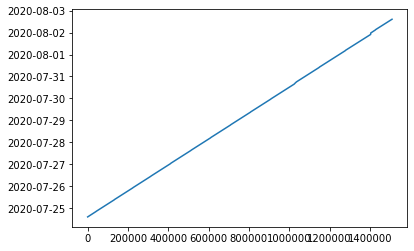

In [4]:
plt.plot(timestamps)

In [5]:
timestamps

array(['2020-07-24T14:35:54.276500', '2020-07-24T14:35:54.776400',
       '2020-07-24T14:35:55.276400', ..., '2020-08-02T14:31:35.716900',
       '2020-08-02T14:31:36.217000', '2020-08-02T14:31:36.716800'],
      dtype='datetime64[us]')

In [6]:
segments_i16 = segments.view('int16').byteswap()

/usr/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


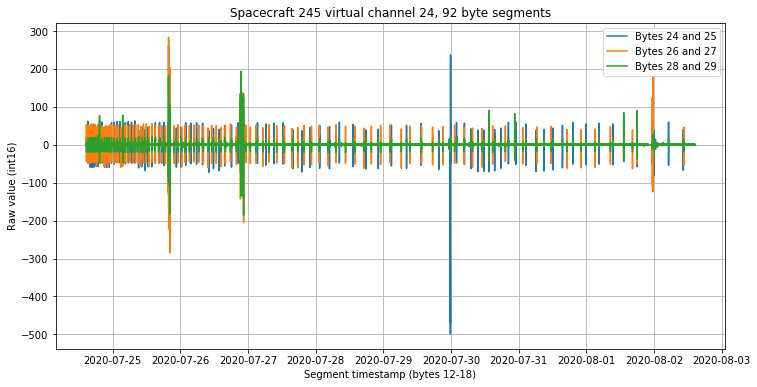

In [7]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps, segments_i16[:,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

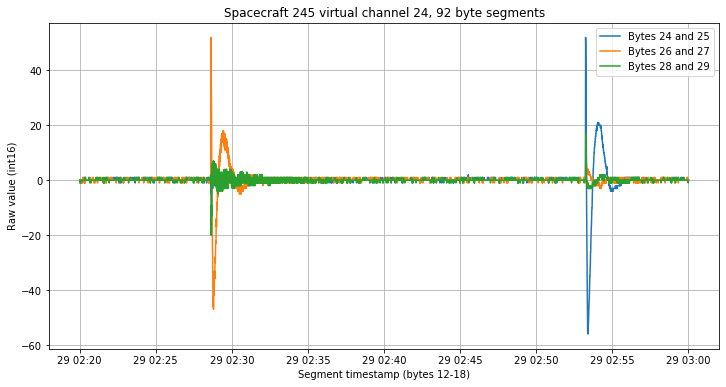

In [8]:
sel = (timestamps >= np.datetime64('2020-07-29T02:20')) & (timestamps <= np.datetime64('2020-07-29T03:00'))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[sel], segments_i16[sel,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

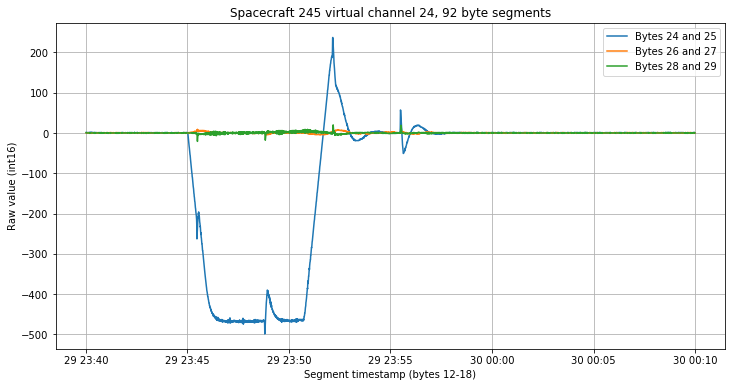

In [9]:
sel = (timestamps >= np.datetime64('2020-07-29T23:40')) & (timestamps <= np.datetime64('2020-07-30T00:10'))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[sel], segments_i16[sel,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

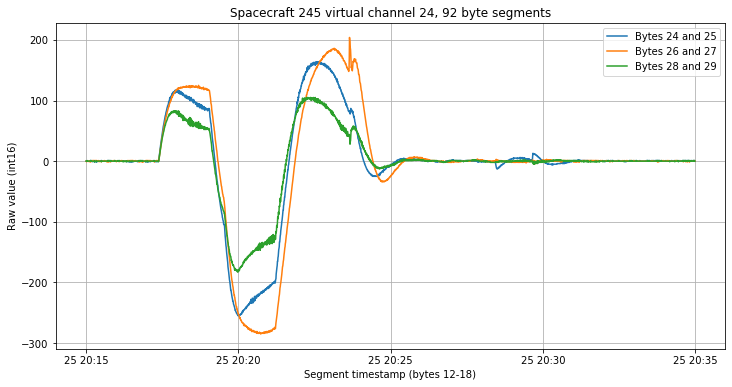

In [10]:
sel = (timestamps >= np.datetime64('2020-07-25T20:15')) & (timestamps <= np.datetime64('2020-07-25T20:35'))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[sel], segments_i16[sel,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

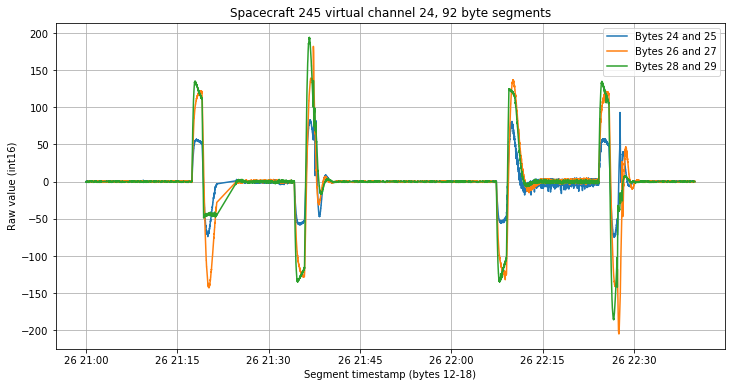

In [11]:
sel = (timestamps >= np.datetime64('2020-07-26T21')) & (timestamps <= np.datetime64('2020-07-26T22:40'))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[sel], segments_i16[sel,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

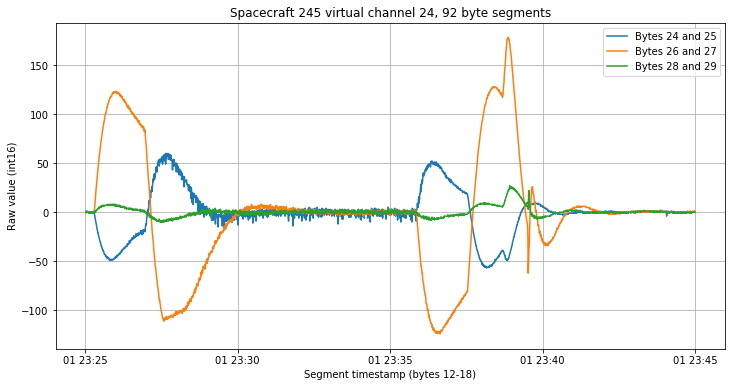

In [12]:
sel = (timestamps >= np.datetime64('2020-08-01T21:55')) & (timestamps <= np.datetime64('2020-08-01T23:45'))
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(timestamps[sel], segments_i16[sel,12:15])
plt.title('Spacecraft 245 virtual channel 24, 92 byte segments')
plt.xlabel('Segment timestamp (bytes 12-18)')
plt.ylabel('Raw value (int16)')
plt.legend([f'Bytes {j} and {j+1}' for j in range(12*2,15*2,2)])
plt.grid();

## Length 24

In [13]:
segments = np.load('hsd_cut2/segments_size_24.npy', mmap_mode = 'r')
segments = segments[segments[:,0] == 10] # filter seemingly invalid segments

In [14]:
segments_i16 = segments.view('int16').byteswap()
segments_i16o = np.copy(segments[:,1:-1]).view('int16').byteswap()

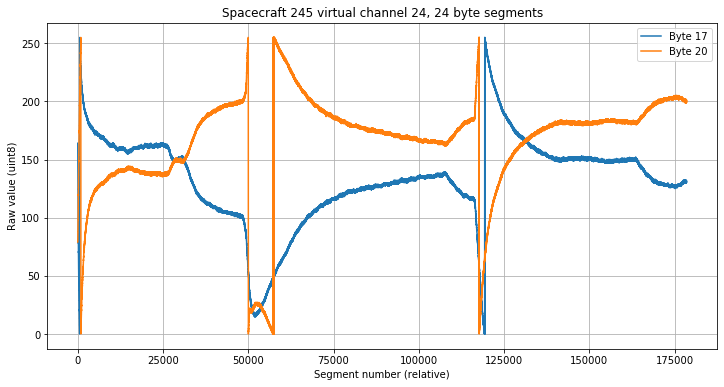

In [15]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,17])
plt.plot(segments[:,20])
plt.title('Spacecraft 245 virtual channel 24, 24 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 17', 'Byte 20'])
plt.grid();

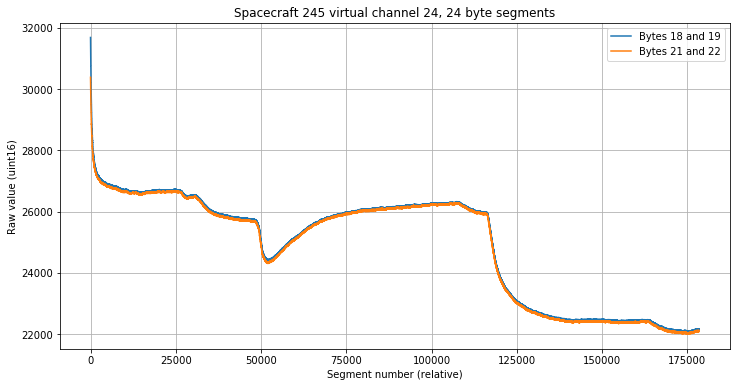

In [16]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments_i16[:,9])
plt.plot(segments_i16o[:,10])
plt.title('Spacecraft 245 virtual channel 24, 24 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint16)')
plt.legend(['Bytes 18 and 19', 'Bytes 21 and 22'])
plt.grid();

## Length 74

In [17]:
segments = np.load('hsd_cut2/segments_size_74.npy', mmap_mode = 'r')
segments = segments[segments[:,1] == 0x3c] # filter seemingly invalid segments

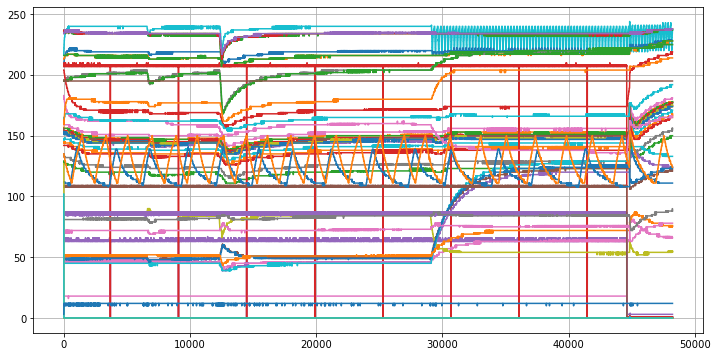

In [18]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,18:70])
plt.grid();

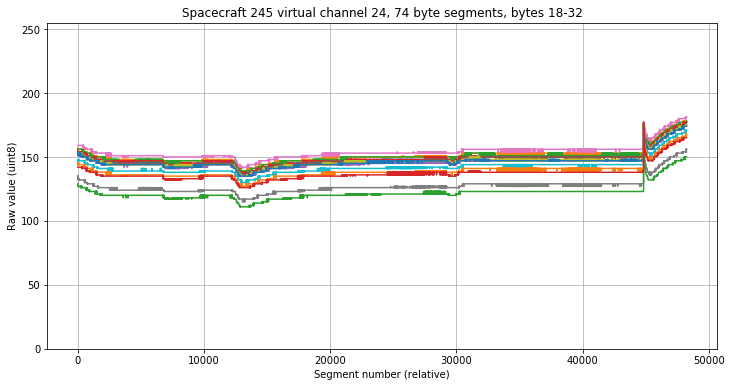

In [19]:
plt.figure(figsize = (12,6), facecolor = 'w')
channels = [18,19,20,21,22,23,24,25,26,27,28,29,30,31]
plt.plot(segments[:,channels])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments, bytes 18-32')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.ylim((0,255));

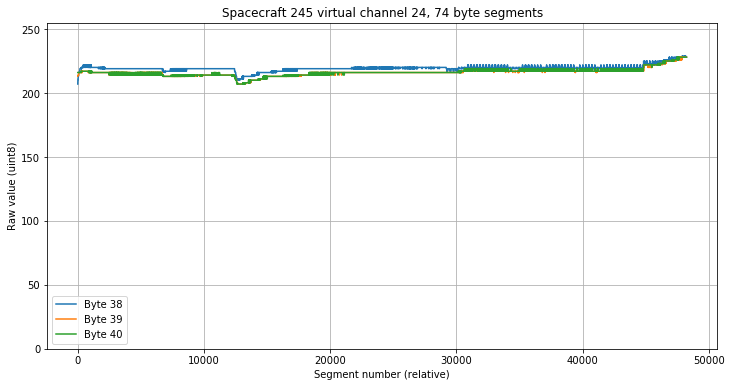

In [20]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[38,39,40]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 38', 'Byte 39', 'Byte 40'])
plt.ylim((0,255));

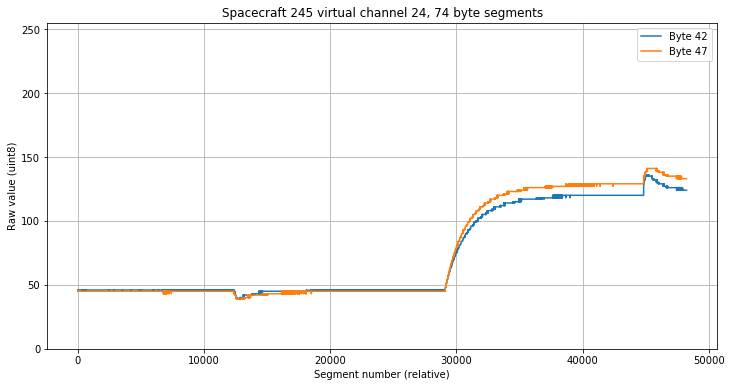

In [21]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[42,47]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 42', 'Byte 47'])
plt.ylim((0,255));

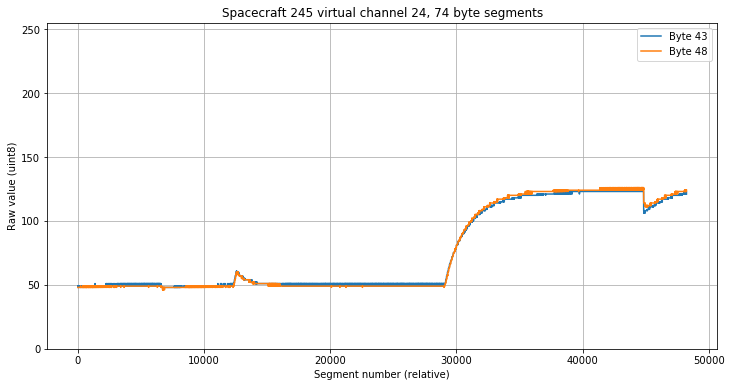

In [22]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[43,48]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 43', 'Byte 48'])
plt.ylim((0,255));

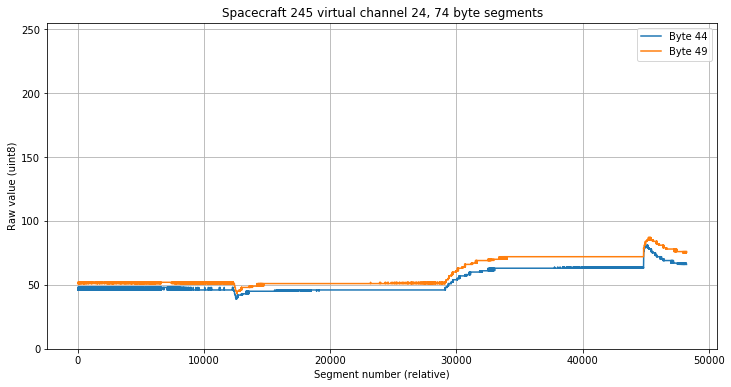

In [23]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[44,49]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 44', 'Byte 49'])
plt.ylim((0,255));

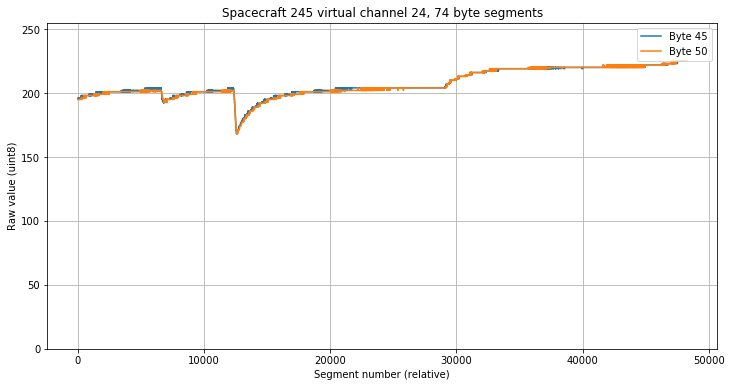

In [24]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[45,50]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 45', 'Byte 50'])
plt.ylim((0,255));

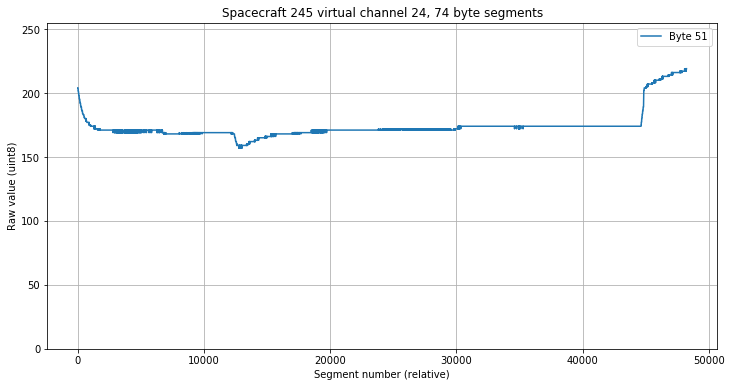

In [25]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[51]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 51'])
plt.ylim((0,255));

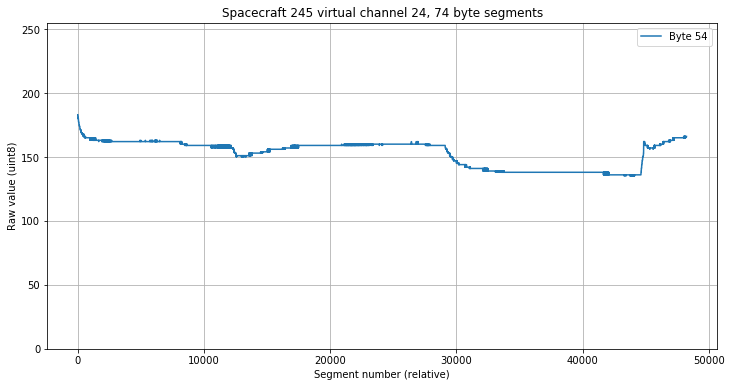

In [26]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[54]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 54'])
plt.ylim((0,255));

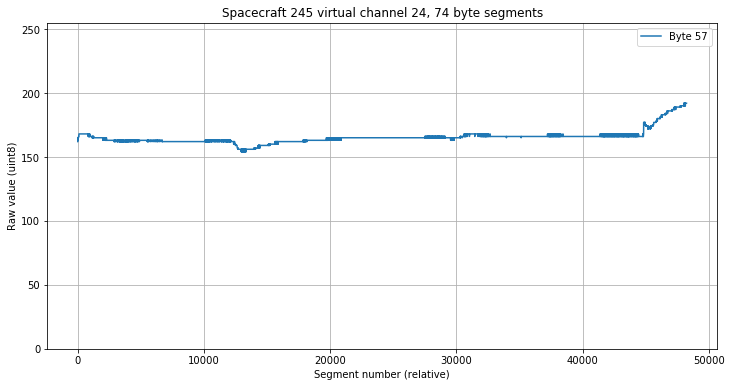

In [27]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[57]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 57'])
plt.ylim((0,255));

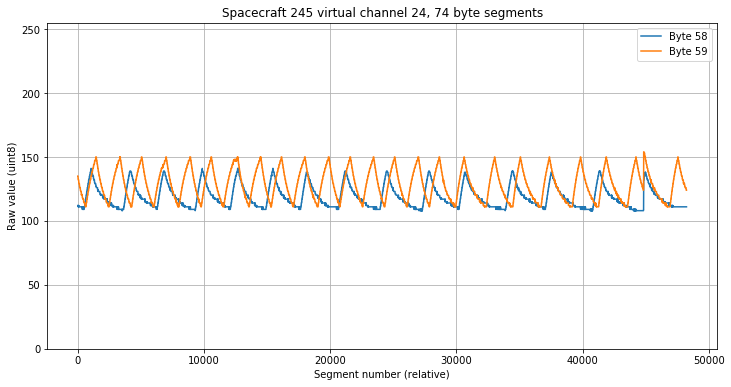

In [28]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[58,59]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 58', 'Byte 59'])
plt.ylim((0,255));

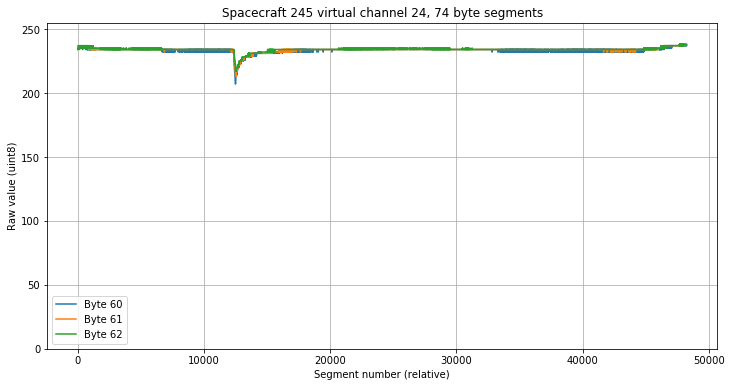

In [29]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[60,61,62]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 60', 'Byte 61', 'Byte 62'])
plt.ylim((0,255));

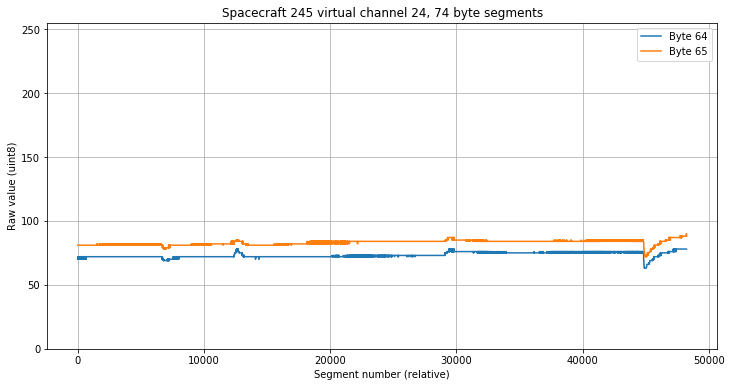

In [30]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[64,65]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 64', 'Byte 65'])
plt.ylim((0,255));

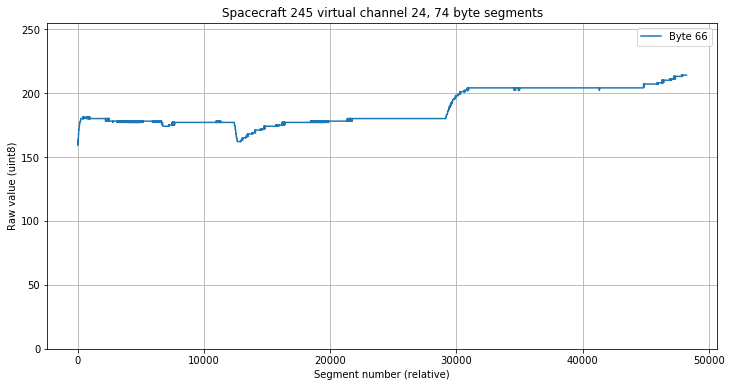

In [31]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(segments[:,[69]])
plt.grid()
plt.title('Spacecraft 245 virtual channel 24, 74 byte segments')
plt.xlabel('Segment number (relative)')
plt.ylabel('Raw value (uint8)')
plt.legend(['Byte 66'])
plt.ylim((0,255));

In [32]:
segments92 = np.load('hsd_cut2/segments_size_92.npy', mmap_mode = 'r')
segments92_i16 = segments92.view('int16').byteswap()
segments24 = np.load('hsd_cut2/segments_size_24.npy', mmap_mode = 'r')
segments24 = segments24[segments24[:,0] == 10] # filter seemingly invalid segments
segments24_i16 = segments24.view('int16').byteswap()
segments74 = np.load('hsd_cut2/segments_size_74.npy', mmap_mode = 'r')
segments74 = segments74[segments74[:,1] == 0x3c] 

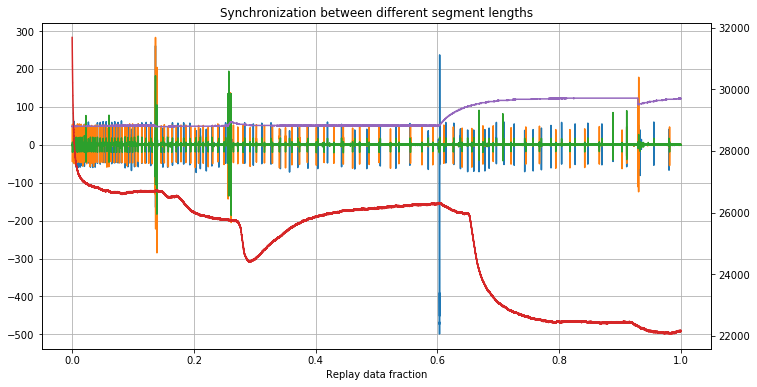

In [33]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(np.arange(segments92.shape[0])/segments92.shape[0],
         segments92_i16[:, 12:15], label = 'foo')
plt.plot(np.arange(segments74.shape[0])/segments74.shape[0],
         segments74[:,43], color = 'C4')
plt.grid()
plt.xlabel('Replay data fraction')
ax2 = plt.gca().twinx()
ax2.plot(np.arange(segments24.shape[0])/segments24.shape[0],
         segments24_i16[:,9], color = 'C3')
plt.title('Synchronization between different segment lengths');